In [82]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
# Load the input data
train_data = pd.read_csv('/content/drive/MyDrive/Python Course/Hackathons/Train_dataset_(2).csv')
test_data = pd.read_csv('/content/drive/MyDrive/Python Course/Hackathons/Test_dataset_(2).csv')

In [85]:
test_data = test_data.rename(columns={"Endoresed By":"Endorsed By"})

In [86]:
df = pd.concat([train_data, test_data], ignore_index=True)

In [41]:
df.head(10)

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000.0,"indian,irish",Bangalore,Near Business Hub,14/02/09,84.30,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000.0,"indian,irish",Indore,Near Party Hub,29/09/08,85.40,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000.0,"tibetan,italian",Chennai,Near Business Hub,30/07/11,85.00,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000.0,"turkish,nigerian",Gurgaon,Near Party Hub,30/11/08,85.60,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000.0,"irish,belgian",Manesar,Near Party Hub,22/02/10,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6
5,60006,30000000.0,"tibetan,greek",Hyderabad,Near Party Hub,28/06/11,89.92,Not Specific,87.0,1,...,NaN,6.0,NaN,4.0,NaN,6.0,5,0,2,5
6,60007,30000000.0,"indian,irish",Banglore,Near Party Hub,28/01/12,86.08,Not Specific,67.5,1,...,7.0,4.0,NaN,3.0,NaN,10.0,6,2,0,4
7,60008,40000000.0,"indian,irish",Bangalore,Near Party Hub,23/05/11,92.00,Tier A Celebrity,91.0,1,...,9.0,NaN,NaN,NaN,4.0,6.0,9,5,4,9
8,60009,60000000.0,"chinese,salvadorian",Noida,Near Party Hub,12/09/10,90.00,Tier A Celebrity,NaN,0,...,10.0,7.0,3.0,NaN,NaN,6.0,8,3,2,6
9,60010,23000000.0,"algerian,belgian",Kolkata,Near Party Hub,08/06/12,NaN,Tier A Celebrity,NaN,1,...,8.0,3.0,3.0,NaN,NaN,4.0,8,3,5,7


In [42]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Registration Number,3993.0,NaN,NaN,NaN,56550.844227,13768.143026,20001.0,60499.0,61497.0,62495.0,63493.0
Annual Turnover,3493.0,NaN,NaN,NaN,30725708.559977,21651246.901146,3500000.0,18000000.0,30000000.0,37000000.0,400000000.0
Cuisine,3993,20,"tibetan,greek",801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,3993,334,Bangalore,627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Restaurant Location,3993,2,Near Party Hub,3036,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Opening Day of Restaurant,3993,1870,27/12/09,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Facebook Popularity Quotient,3894.0,NaN,NaN,NaN,77.887678,9.861789,43.0,71.66,79.0,85.6675,97.76
Endorsed By,3993,3,Not Specific,2260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Instagram Popularity Quotient,3937.0,NaN,NaN,NaN,74.448954,10.990665,40.0,66.0,74.33,82.6,98.7
Fire Audit,3993.0,NaN,NaN,NaN,0.791886,0.40601,0.0,1.0,1.0,1.0,1.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3993 entries, 0 to 3992
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3993 non-null   int64  
 1   Annual Turnover                3493 non-null   float64
 2   Cuisine                        3993 non-null   object 
 3   City                           3993 non-null   object 
 4   Restaurant Location            3993 non-null   object 
 5   Opening Day of Restaurant      3993 non-null   object 
 6   Facebook Popularity Quotient   3894 non-null   float64
 7   Endorsed By                    3993 non-null   object 
 8   Instagram Popularity Quotient  3937 non-null   float64
 9   Fire Audit                     3993 non-null   int64  
 10  Liquor License Obtained        3993 non-null   int64  
 11  Situated in a Multi Complex    3993 non-null   int64  
 12  Dedicated Parking              3993 non-null   i

In [87]:
df["Opening Day of Restaurant"] = pd.to_datetime(df["Opening Day of Restaurant"])

In [88]:
import datetime
from datetime import date

df["Age Offset 2010 Debut"] = ((df["Opening Day of Restaurant"].dt.date-date(2010, 1, 1)))/np.timedelta64(1, 'D')

In [89]:
df = df.drop('Opening Day of Restaurant', axis=1)

In [47]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Registration Number,3993.0,NaN,NaN,NaN,56550.844227,13768.143026,20001.0,60499.0,61497.0,62495.0,63493.0
Annual Turnover,3493.0,NaN,NaN,NaN,30725708.559977,21651246.901146,3500000.0,18000000.0,30000000.0,37000000.0,400000000.0
Cuisine,3993,20,"tibetan,greek",801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,3993,334,Bangalore,627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Restaurant Location,3993,2,Near Party Hub,3036,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Facebook Popularity Quotient,3894.0,NaN,NaN,NaN,77.887678,9.861789,43.0,71.66,79.0,85.6675,97.76
Endorsed By,3993,3,Not Specific,2260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Instagram Popularity Quotient,3937.0,NaN,NaN,NaN,74.448954,10.990665,40.0,66.0,74.33,82.6,98.7
Fire Audit,3993.0,NaN,NaN,NaN,0.791886,0.40601,0.0,1.0,1.0,1.0,1.0
Liquor License Obtained,3993.0,NaN,NaN,NaN,0.987979,0.108993,0.0,1.0,1.0,1.0,1.0


In [90]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer

In [49]:
df.isnull().sum()

Registration Number                 0
Annual Turnover                   500
Cuisine                             0
City                                0
Restaurant Location                 0
Facebook Popularity Quotient       99
Endorsed By                         0
Instagram Popularity Quotient      56
Fire Audit                          0
Liquor License Obtained             0
Situated in a Multi Complex         0
Dedicated Parking                   0
Open Sitting Available              0
Resturant Tier                     49
Restaurant Type                     0
Restaurant Theme                    0
Restaurant Zomato Rating            0
Restaurant City Tier                0
Order Wait Time                     0
Staff Responsivness                 0
Value for Money                     0
Hygiene Rating                      0
Food Rating                         0
Overall Restaurant Rating         246
Live Music Rating                 867
Comedy Gigs Rating               2853
Value Deals 

<ipython-input-50-f32db7e60b79>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)


<Axes: >

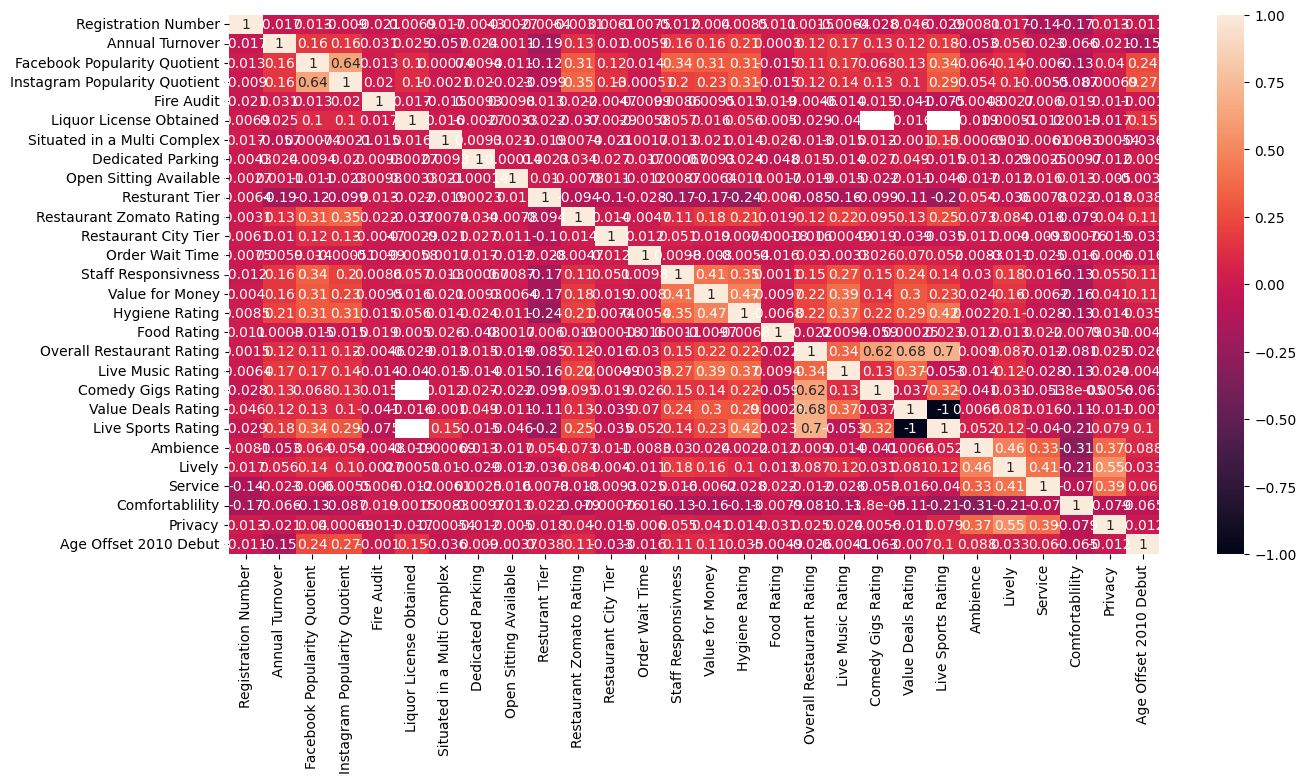

In [50]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

In [51]:
# defining columns where we need to drop because of too many missing values
cols2 = ["Comedy Gigs Rating", "Value Deals Rating", "Live Sports Rating"]

In [52]:
df = df.drop(cols2, axis=1)

In [53]:
df.isnull().sum()

Registration Number                0
Annual Turnover                  500
Cuisine                            0
City                               0
Restaurant Location                0
Facebook Popularity Quotient      99
Endorsed By                        0
Instagram Popularity Quotient     56
Fire Audit                         0
Liquor License Obtained            0
Situated in a Multi Complex        0
Dedicated Parking                  0
Open Sitting Available             0
Resturant Tier                    49
Restaurant Type                    0
Restaurant Theme                   0
Restaurant Zomato Rating           0
Restaurant City Tier               0
Order Wait Time                    0
Staff Responsivness                0
Value for Money                    0
Hygiene Rating                     0
Food Rating                        0
Overall Restaurant Rating        246
Live Music Rating                867
Ambience                          25
Lively                             0
S

In [54]:
df.isnull().sum()

Registration Number                0
Annual Turnover                  500
Cuisine                            0
City                               0
Restaurant Location                0
Facebook Popularity Quotient      99
Endorsed By                        0
Instagram Popularity Quotient     56
Fire Audit                         0
Liquor License Obtained            0
Situated in a Multi Complex        0
Dedicated Parking                  0
Open Sitting Available             0
Resturant Tier                    49
Restaurant Type                    0
Restaurant Theme                   0
Restaurant Zomato Rating           0
Restaurant City Tier               0
Order Wait Time                    0
Staff Responsivness                0
Value for Money                    0
Hygiene Rating                     0
Food Rating                        0
Overall Restaurant Rating        246
Live Music Rating                867
Ambience                          25
Lively                             0
S

In [55]:
# defining columns for which we need to impute missing values
cols3 = ["Facebook Popularity Quotient", "Instagram Popularity Quotient", "Resturant Tier", "Restaurant Zomato Rating", "Overall Restaurant Rating", "Live Music Rating", "Ambience", "Lively"]

In [56]:
# Let's impute missing values of the training data using median value
df[cols3] = df[cols3].fillna(value = df.groupby(['Cuisine','City','Restaurant Location','Restaurant Type'])[cols3].transform('median'))

In [57]:
df.isnull().sum()

Registration Number                0
Annual Turnover                  500
Cuisine                            0
City                               0
Restaurant Location                0
Facebook Popularity Quotient      20
Endorsed By                        0
Instagram Popularity Quotient      9
Fire Audit                         0
Liquor License Obtained            0
Situated in a Multi Complex        0
Dedicated Parking                  0
Open Sitting Available             0
Resturant Tier                    10
Restaurant Type                    0
Restaurant Theme                   0
Restaurant Zomato Rating           0
Restaurant City Tier               0
Order Wait Time                    0
Staff Responsivness                0
Value for Money                    0
Hygiene Rating                     0
Food Rating                        0
Overall Restaurant Rating         75
Live Music Rating                286
Ambience                           3
Lively                             0
S

In [58]:
# Let's impute missing values using median value
df[cols3] = df[cols3].fillna(value = df.groupby(['City','Restaurant Location'])[cols3].transform('median'))

In [59]:
df.isnull().sum()

Registration Number                0
Annual Turnover                  500
Cuisine                            0
City                               0
Restaurant Location                0
Facebook Popularity Quotient       6
Endorsed By                        0
Instagram Popularity Quotient      2
Fire Audit                         0
Liquor License Obtained            0
Situated in a Multi Complex        0
Dedicated Parking                  0
Open Sitting Available             0
Resturant Tier                     3
Restaurant Type                    0
Restaurant Theme                   0
Restaurant Zomato Rating           0
Restaurant City Tier               0
Order Wait Time                    0
Staff Responsivness                0
Value for Money                    0
Hygiene Rating                     0
Food Rating                        0
Overall Restaurant Rating         21
Live Music Rating                110
Ambience                           2
Lively                             0
S

In [60]:
# Let's impute missing values using median value
df[cols3] = df[cols3].fillna(value = df.groupby(['City'])[cols3].transform('median'))

In [61]:
df.isnull().sum()

Registration Number                0
Annual Turnover                  500
Cuisine                            0
City                               0
Restaurant Location                0
Facebook Popularity Quotient       5
Endorsed By                        0
Instagram Popularity Quotient      2
Fire Audit                         0
Liquor License Obtained            0
Situated in a Multi Complex        0
Dedicated Parking                  0
Open Sitting Available             0
Resturant Tier                     1
Restaurant Type                    0
Restaurant Theme                   0
Restaurant Zomato Rating           0
Restaurant City Tier               0
Order Wait Time                    0
Staff Responsivness                0
Value for Money                    0
Hygiene Rating                     0
Food Rating                        0
Overall Restaurant Rating         19
Live Music Rating                100
Ambience                           2
Lively                             0
S

In [62]:
# Let's impute missing values using median value
df[cols3] = df[cols3].fillna(value = df.groupby(['Cuisine'])[cols3].transform('median'))

In [63]:
df.isnull().sum()

Registration Number                0
Annual Turnover                  500
Cuisine                            0
City                               0
Restaurant Location                0
Facebook Popularity Quotient       0
Endorsed By                        0
Instagram Popularity Quotient      0
Fire Audit                         0
Liquor License Obtained            0
Situated in a Multi Complex        0
Dedicated Parking                  0
Open Sitting Available             0
Resturant Tier                     0
Restaurant Type                    0
Restaurant Theme                   0
Restaurant Zomato Rating           0
Restaurant City Tier               0
Order Wait Time                    0
Staff Responsivness                0
Value for Money                    0
Hygiene Rating                     0
Food Rating                        0
Overall Restaurant Rating          0
Live Music Rating                  0
Ambience                           0
Lively                             0
S

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3993 entries, 0 to 3992
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Registration Number            3993 non-null   int64   
 1   Annual Turnover                3493 non-null   float64 
 2   Cuisine                        3993 non-null   category
 3   City                           3993 non-null   category
 4   Restaurant Location            3993 non-null   category
 5   Facebook Popularity Quotient   3993 non-null   float64 
 6   Endorsed By                    3993 non-null   category
 7   Instagram Popularity Quotient  3993 non-null   float64 
 8   Fire Audit                     3993 non-null   int64   
 9   Liquor License Obtained        3993 non-null   int64   
 10  Situated in a Multi Complex    3993 non-null   int64   
 11  Dedicated Parking              3993 non-null   int64   
 12  Open Sitting Available         399

In [91]:
oneHotCols=["Cuisine","Restaurant Location","City","Endorsed By","Restaurant Type","Restaurant Theme"]

In [92]:
df=pd.get_dummies(df, columns=oneHotCols, drop_first=True)

In [93]:
# Select entries from df that have same Registration Number with train_data and test_data respectively
train_data = df[df['Registration Number'].isin(train_data['Registration Number'])]
test_data = df[df['Registration Number'].isin(test_data['Registration Number'])]

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd

# Extract features and target from train dataset
X = train_data.drop(columns=['Registration Number', 'Annual Turnover'])
y = train_data['Annual Turnover']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
bagging_regressor = BaggingRegressor(random_state=42)
his_gradient_boosting_regressor = HistGradientBoostingRegressor (random_state=42)
decision_tree_regressor = DecisionTreeRegressor(random_state=42)

# Create the stacking regressor models with different combinations
stacking_regressor_1 = StackingRegressor(
    estimators=[('his_gradient_boosting', his_gradient_boosting_regressor), ('decision_tree', decision_tree_regressor)],
    final_estimator=gradient_boosting_regressor
)

stacking_regressor_2 = StackingRegressor(
    estimators=[('decision_tree', decision_tree_regressor), ('his_gradient_boosting', his_gradient_boosting_regressor)],
    final_estimator=decision_tree_regressor
)

stacking_regressor_3 = StackingRegressor(
    estimators=[('bagging', BaggingRegressor), ('his_gradient_boosting', his_gradient_boosting_regressor)],
    final_estimator=bagging_regressor
)

stacking_regressor_4 = StackingRegressor(
    estimators=[('bagging', BaggingRegressor), ('decision_tree', decision_tree_regressor), ('his_gradient_boosting', his_gradient_boosting_regressor)],
    final_estimator=his_gradient_boosting_regressor
)

# Train the stacking regressor models
#stacking_regressor_1.fit(X_train, y_train)
#stacking_regressor_2.fit(X_train, y_train)
stacking_regressor_3.fit(X_train, y_train)
stacking_regressor_4.fit(X_train, y_train)

# Make predictions on the validation set using the stacking regressor models
#y_pred_val_1 = stacking_regressor_1.predict(X_val)
y_pred_val_2 = stacking_regressor_2.predict(X_val)
y_pred_val_3 = stacking_regressor_3.predict(X_val)
y_pred_val_4 = stacking_regressor_4.predict(X_val)

# Calculate the root mean squared error on the validation set for the stacking regressor models
rmse_1 = np.sqrt(mean_squared_error(y_val, y_pred_val_1))
rmse_2 = np.sqrt(mean_squared_error(y_val, y_pred_val_2))
rmse_3 = np.sqrt(mean_squared_error(y_val, y_pred_val_3))
rmse_4 = np.sqrt(mean_squared_error(y_val, y_pred_val_4))

# Perform hyperparameter tuning for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(random_forest_regressor, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best RandomForestRegressor model
best_random_forest = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_val_rf = best_random_forest.predict(X_val)

# Calculate the RMSE on the validation set using the best model
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_val_rf))

# Perform cost complexity pruning with multiple alpha values
ccp_alphas = [0.001, 0.002, 0.005]
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

rmse_values = [np.sqrt(mean_squared_error(y_val, clf.predict(X_val))) for clf in clfs]

best_alpha = ccp_alphas[np.argmin(rmse_values)]
best_pruned_model = clfs[np.argmin(rmse_values)]

# Make predictions on the validation dataset using the best pruning model
y_pred_val_pruned = best_pruned_model.predict(X_val)

# Calculate RMSE on the validation dataset for the best pruning model
rmse_pruned = np.sqrt(mean_squared_error(y_val, y_pred_val_pruned))

# Make predictions on the test dataset using the best models
y_pred_test_1 = stacking_regressor_1.predict(test_data.drop(columns=['Registration Number', 'Annual Turnover']))
y_pred_test_2 = stacking_regressor_2.predict(test_data.drop(columns=['Registration Number', 'Annual Turnover']))
y_pred_test_3 = stacking_regressor_3.predict(test_data.drop(columns=['Registration Number', 'Annual Turnover']))
y_pred_test_4 = stacking_regressor_4.predict(test_data.drop(columns=['Registration Number', 'Annual Turnover']))
y_pred_test_rf = best_random_forest.predict(test_data.drop(columns=['Registration Number', 'Annual Turnover']))
y_pred_test_pruned = best_pruned_model.predict(test_data.drop(columns=['Registration Number', 'Annual Turnover']))

predictions = pd.DataFrame()
predictions['Registration Number'] = test_data['Registration Number'].copy()

# Compare RMSE values of validation dataset and select the model with the lowest RMSE
best_model = 'Stacking Regressor 1'

if rmse_2 < rmse_1:
    best_model = 'Stacking Regressor 2'

if rmse_3 < rmse_2:
    best_model = 'Stacking Regressor 3'

if rmse_4 < rmse_3:
    best_model = 'Stacking Regressor 4'

if rmse_rf < rmse_4:
    best_model = 'Random Forest'

if rmse_pruned < rmse_rf:
    best_model = 'Pruned Decision Tree'

# Use the predictions from the best-performing model
if best_model == 'Stacking Regressor 1':
    predictions['Annual Turnover'] = y_pred_test_1
    pred_val = y_pred_val_1
elif best_model == 'Stacking Regressor 2':
    predictions['Annual Turnover'] = y_pred_test_2
    pred_val = y_pred_val_2
elif best_model == 'Stacking Regressor 3':
    predictions['Annual Turnover'] = y_pred_test_3
    pred_val = y_pred_val_3
elif best_model == 'Stacking Regressor 4':
    predictions['Annual Turnover'] = y_pred_test_4
    pred_val = y_pred_val_4
elif best_model == 'Random Forest':
    predictions['Annual Turnover'] = y_pred_test_rf
    pred_val = y_pred_val_rf
elif best_model == 'Pruned Decision Tree':
    predictions['Annual Turnover'] = y_pred_test_pruned
    pred_val = y_pred_val_pruned


mse_val = mean_squared_error(y_val, pred_val)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, pred_val)

# Save predictions to CSV file
predictions[['Registration Number', 'Annual Turnover']].to_csv('/content/drive/MyDrive/Python Course/Hackathons/Restaurant Turnover Prediction_Ariel Sama_temp.csv', index=False)

print(best_model)
print("Validation Root Mean Squared Error:", rmse_val)
print("Validation R-squared:", r2_val)

TypeError: ignored

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd


# Extract features and target from train dataset
X = train_data.drop(columns=['Registration Number', 'Annual Turnover'])
y = train_data['Annual Turnover']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 2: Train the base models

gradient_boosting_regressor = GradientBoostingRegressor(random_state=42)
ridge_regressor = Ridge()
lasso_regressor = Lasso()
svr_regressor = SVR()
bagging_regressor = BaggingRegressor()
#his_gradient_boosting_regressor = HistGradientBoostingRegressor (random_state=42)

#models = [bagging_regressor,linear_regressor, random_forest_regressor, gradient_boosting_regressor,
          #ridge_regressor, lasso_regressor, svr_regressor,his_gradient_boosting_regressor]

models1 = [bagging_regressor, lasso_regressor]

# Step 3: Generate predictions from the base models and create stacked dataset for validation
X_stacked_val = np.zeros((X_val.shape[0], len(models)))

for i, model in enumerate(models1):
    model.fit(X_train, y_train)
    preds_val = model.predict(X_val)

    X_stacked_val[:, i] = preds_val

# Step 4: Train the meta model on the stacked dataset
meta_model = LinearRegression()
meta_model.fit(X_stacked_val, y_val)

# Step 5: Generate predictions from the meta model on the validation set
preds_meta_val = meta_model.predict(X_stacked_val)

# Step 6: Generate predictions from the meta model on the test set
X_stacked_test = np.zeros((X_test.shape[0], len(models)))

for i, model in enumerate(models1):
    model.fit(X_train, y_train)
    preds_test = model.predict(X_test)
    X_stacked_test[:, i] = preds_test

preds_meta_test = meta_model.predict(X_stacked_test)

# Step 7: Evaluate the performance of the meta model on the validation set and export the prediction on the test set
mse_val = mean_squared_error(y_val, preds_meta_val)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, preds_meta_val)

# Create a DataFrame for the predicted values and IDs
predictions = pd.DataFrame({'Registration Number': test_data['Registration Number'], 'Annual Turnover': preds_meta_test})

# Save predictions to a CSV file
predictions[['Registration Number', 'Annual Turnover']].to_csv('/content/drive/MyDrive/Python Course/Hackathons/Restaurant Turnover Prediction_Ariel Sama7_temp.csv', index=False)


ValueError: ignored